In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from haversine import haversine

In [14]:
path=r'../data/drive-me-not/processed/'
filename=r'spoofed_trace4_unique_cell.csv'
data=pd.read_csv(path+filename) 
data=data[['Time','GPS_lat','GPS_long','lat','lon','spoofed']]
print(data)

               Time    GPS_lat   GPS_long        lat        lon  spoofed
0     1561285791859  25.368868  51.551123  25.369492  51.550598      0.0
1     1561285791859  25.368868  51.551123  25.367661  51.550369      0.0
2     1561285791859  25.368868  51.551123  25.368256  51.557053      0.0
3     1561285791859  25.368868  51.551123  25.366287  51.551102      0.0
4     1561285791859  25.368868  51.551123  25.368494  51.552817      0.0
...             ...        ...        ...        ...        ...      ...
5859  1561287660910  25.420408  51.623206  25.304204  51.513501      1.0
5860  1561287660910  25.420408  51.623206  25.313736  51.517776      1.0
5861  1561287660910  25.420408  51.623206  25.317307  51.520615      1.0
5862  1561287660910  25.420408  51.623206  25.317536  51.527775      1.0
5863  1561287660910  25.420408  51.623206  25.291443  51.530685      1.0

[5864 rows x 6 columns]


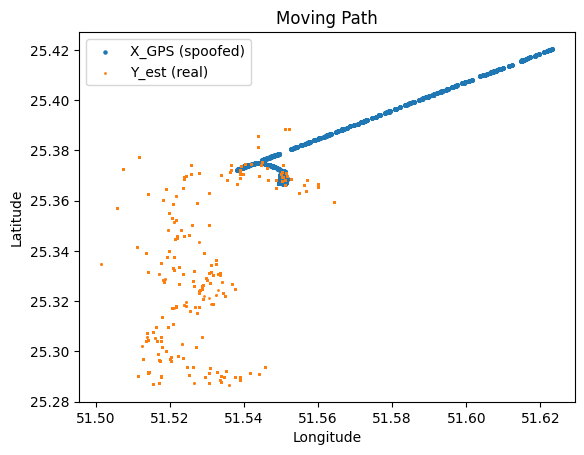

In [15]:
plt.scatter(data['GPS_long'], data['GPS_lat'],s=5,label='X_GPS (spoofed)')
plt.scatter(data['lon'], data['lat'],s=1,label='Y_est (real)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Moving Path')
plt.legend()
plt.savefig(r'../outputs/png/Garrett_moving_path')
plt.show()

In [16]:
#Garrett's first method
data['d_e']=data.apply(lambda row: haversine((row['GPS_lat'],row['GPS_long']),(row['lat'],row['lon'])), axis=1)
#Calculate the impact of different thresholds.
threadshold=np.arange(0.5,11,0.5,dtype=float)
for th in threadshold:
    name='th_'+str(th)
    data[name]=data.apply(lambda row: row['d_e']>th, axis=1)
print(data)

               Time    GPS_lat   GPS_long        lat        lon  spoofed  \
0     1561285791859  25.368868  51.551123  25.369492  51.550598      0.0   
1     1561285791859  25.368868  51.551123  25.367661  51.550369      0.0   
2     1561285791859  25.368868  51.551123  25.368256  51.557053      0.0   
3     1561285791859  25.368868  51.551123  25.366287  51.551102      0.0   
4     1561285791859  25.368868  51.551123  25.368494  51.552817      0.0   
...             ...        ...        ...        ...        ...      ...   
5859  1561287660910  25.420408  51.623206  25.304204  51.513501      1.0   
5860  1561287660910  25.420408  51.623206  25.313736  51.517776      1.0   
5861  1561287660910  25.420408  51.623206  25.317307  51.520615      1.0   
5862  1561287660910  25.420408  51.623206  25.317536  51.527775      1.0   
5863  1561287660910  25.420408  51.623206  25.291443  51.530685      1.0   

            d_e  th_0.5  th_1.0  th_1.5  ...  th_6.0  th_6.5  th_7.0  th_7.5  \
0      

In [17]:
def all_is_true(x):
    for i in x:
        if i==False:
            return False
    return True

#Calculate the impact of different bursts length.
burst_length=np.arange(1,20,1,dtype=int)
attack_start_id=np.where(data['spoofed']==1)[0][0]
attack_start_time=data['Time'][attack_start_id]

#An empty 2d data frame to store the result of FP. rows: burst_length, columns: threadshold 
fp_data=pd.DataFrame(columns=threadshold)
#An empty 2d data frame to store the result of time to detect.
detect_time_data=pd.DataFrame(columns=threadshold)

for th in threadshold:
    name='th_'+str(th)
    fp_arr=np.array([])
    detect_time_arr=np.array([])

    for bl in burst_length:
        num_fp=0
        detect_time=data['Time'][data.shape[0]-1]-attack_start_time

        for i in range(data.shape[0]-bl+1):
            if all_is_true(data[name][i:i+bl]):
                if i<=attack_start_id:
                    num_fp=num_fp+1
                else:
                    detect_time=data['Time'][i+bl-1]-attack_start_time
                    break
        fp_rate=num_fp/attack_start_id
        fp_arr=np.append(fp_arr,fp_rate)
        detect_time=detect_time/1000 #change ms to s
        detect_time_arr=np.append(detect_time_arr,detect_time)

    fp_data[th]=fp_arr
    detect_time_data[th]=detect_time_arr

print(fp_data)

        0.5       1.0       1.5       2.0       2.5       3.0       3.5   \
0   0.556439  0.334817  0.284261  0.251192  0.210175  0.152941  0.152941   
1   0.308108  0.102703  0.085215  0.072814  0.047377  0.019396  0.019396   
2   0.172019  0.015262  0.011129  0.011129  0.002226  0.001272  0.001272   
3   0.091256  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.040700  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.018124  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.006041  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.002544  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

In [18]:
print(detect_time_data)

      0.5      1.0      1.5      2.0      2.5      3.0      3.5      4.0   \
0    0.000    0.000    0.000   15.319   43.079   80.502   80.502  105.257   
1    0.000    0.000    0.000   80.502   80.502   80.502  105.257  123.230   
2    0.000   51.362   55.887   80.502   96.848  132.787  157.348  166.105   
3    0.000   55.887   55.887   87.969  105.257  157.348  157.348  224.001   
4    0.000   55.887   87.969   87.969  129.409  157.348  157.348  224.001   
5    0.000   87.969   87.969   87.969  129.409  157.348  157.348  224.001   
6   10.129   87.969   87.969   97.889  129.409  157.348  172.653  224.001   
7   51.614   97.889   97.889  105.953  157.348  224.001  224.001  224.001   
8   51.614  105.953  105.953  105.953  157.348  224.001  224.001  224.001   
9   51.614  105.953  105.953  105.953  166.105  224.001  224.001  224.001   
10  51.614  105.953  105.953  120.312  166.105  224.001  224.001  224.001   
11  55.887  108.376  123.546  123.546  166.105  224.001  224.001  224.001   

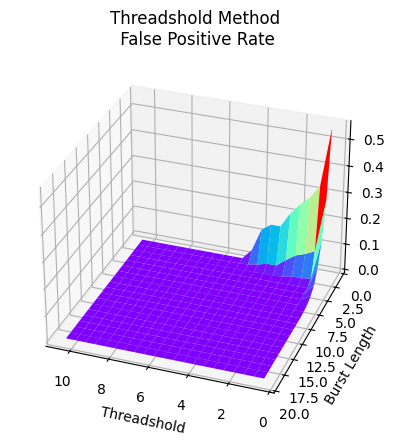

In [19]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, burst_length)
Z = fp_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30, 110)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Burst Length')
ax3.set_zlabel('')
plt.title('Threadshold Method\n False Positive Rate')
plt.savefig(r'../outputs/png/Garrett_FP_rate')
plt.show()


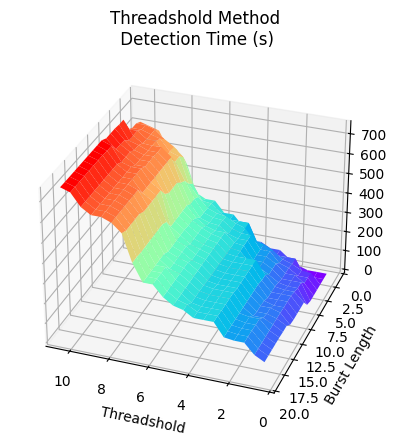

In [20]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, burst_length)
Z = detect_time_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30,110)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Burst Length')
ax3.set_zlabel('')
plt.title('Threadshold Method\n Detection Time (s)')
plt.savefig(r'../outputs/png/Garrett_detection_time')
plt.show()

In [21]:
def sum_larger_than_thredshold(x,th):
    s=0
    for i in x:
        s=s+i
    if s>th:
        return True
    else:
        return False

#Garrett's CUSUM method
threadshold=np.arange(5,130,5,dtype=int)
window_length=np.arange(2,100,5,dtype=int)

#An empty 2d data frame to store the result of FP. rows: window_length, columns: threadshold 
fp_data=pd.DataFrame(columns=threadshold)
#An empty 2d data frame to store the result of time to detect.
detect_time_data=pd.DataFrame(columns=threadshold)

for th in threadshold:
    name='d_e'
    fp_arr=np.array([])
    detect_time_arr=np.array([])

    for wl in window_length:
        num_fp=0
        detect_time=data['Time'][data.shape[0]-1]-attack_start_time

        for i in range(data.shape[0]-wl+1):
            if sum_larger_than_thredshold(data[name][i:i+wl],th):
                if i<=attack_start_id:
                    num_fp=num_fp+1
                else:
                    detect_time=data['Time'][i+wl-1]-attack_start_time
                    break
        fp_rate=num_fp/attack_start_id
        fp_arr=np.append(fp_arr,fp_rate)
        detect_time=detect_time/1000 #change ms to s
        detect_time_arr=np.append(detect_time_arr,detect_time)

    fp_data[th]=fp_arr
    detect_time_data[th]=detect_time_arr

print(fp_data)

         5         10        15        20        25        30        35   \
0   0.165660  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.799682  0.387917  0.091256  0.003816  0.000000  0.000000  0.000000   
2   1.000318  0.845787  0.612401  0.178378  0.009857  0.000000  0.000000   
3   1.000318  0.947536  0.838792  0.659141  0.353577  0.068045  0.005087   
4   1.000318  0.996820  0.930366  0.823847  0.700159  0.492210  0.191097   
5   1.000318  1.000318  0.958347  0.912878  0.824801  0.778060  0.575835   
6   1.000318  1.000318  0.997456  0.944992  0.894754  0.820032  0.785056   
7   1.000318  1.000318  1.000318  0.967250  0.934817  0.870270  0.818760   
8   1.000318  1.000318  1.000318  1.000318  0.952941  0.923688  0.853100   
9   1.000318  1.000318  1.000318  1.000318  0.975835  0.945946  0.914785   
10  1.000318  1.000318  1.000318  1.000318  1.000318  0.954849  0.940859   
11  1.000318  1.000318  1.000318  1.000318  1.000318  0.980604  0.951987   
12  1.000318

In [22]:
print(detect_time_data)

       5        10       15       20       25        30        35        40   \
0   80.502  224.001  359.851  622.187  747.690  1020.410  1472.788  1512.662   
1    0.000   51.362   80.502  105.257  157.348   224.001   224.001   266.638   
2    1.022   10.129   55.732   80.502   82.634   105.257   123.546   157.348   
3    1.022    1.022   20.707   51.362   80.502    82.634    82.634    93.662   
4    1.022    1.022    1.022   23.757   40.819    55.887    80.502    82.634   
5    2.550    2.550    2.550    2.550   40.523    51.362    55.887    80.502   
6    2.550    2.550    2.550    2.550    2.550    40.819    43.079    55.732   
7   10.129   10.129   10.129   10.129   10.129    20.707    40.819    51.362   
8   10.129   10.129   10.129   10.129   10.129    10.129    23.187    40.819   
9   10.625   10.625   10.625   10.625   10.625    10.625    10.625    23.757   
10  10.625   10.625   10.625   10.625   10.625    10.625    10.625    12.987   
11  10.625   10.625   10.625   10.625   

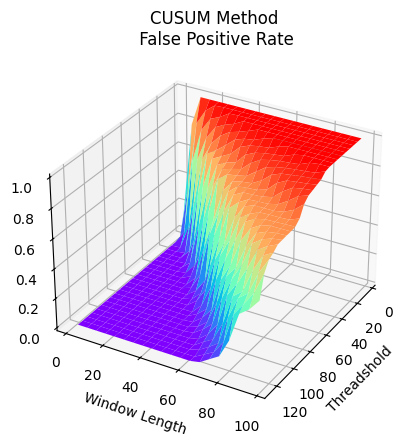

In [23]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, window_length)
Z = fp_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30, 30)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Window Length')
ax3.set_zlabel('')
plt.title('CUSUM Method\n False Positive Rate')
plt.savefig(r'../outputs/png/Garrett_FP_rate_CUSUM')
plt.show()

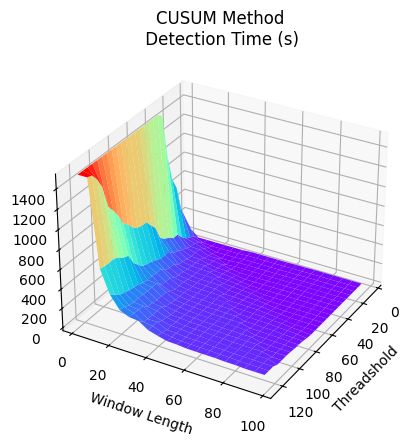

In [24]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, window_length)
Z = detect_time_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30,30)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Window Length')
ax3.set_zlabel('')
plt.title('CUSUM Method\n Detection Time (s)')
plt.savefig(r'../outputs/png/Garrett_detection_time_CUSUM')
plt.show()